#### Importing Necessary libraries

In [29]:
import pandas as pd
import numpy as np
import re
from IPython.display import display
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib 
import os 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

#### Data Loading

In [2]:
df = pd.read_csv("data/karkidi_jobs_selenium_BULK_datascience.csv")

#### Data Cleaning and Preprocessing

In [3]:
display(df.head())
print(df.info)
print(df.shape)

,Title,Company,Location,Experience,Summary,Skills,Posting_Date,Job_URL,Job_Type,Scraped_Timestamp
0,Machine Learning Physical Design Engineer,Google,"Bengaluru, Karnataka, India",4-6 year,Minimum qualifications: Bachelor's degree in E...,"Aartificial intelligence,Algorithms,Data struc...",20 May 2025,https://www.karkidi.com/job-details/89536-mach...,Full Time,2025-05-20T17:56:56.028158
1,"Staff Software Engineer - Monetization, Poe (R...","Quora, Inc.",India,8-10 year,About Quora: Quora’s mission is to grow and sh...,"Aartificial intelligence,Analytical and Proble...",17 May 2025,https://www.karkidi.com/job-details/89511-staf...,Full Time,2025-05-20T17:56:56.029094
2,Staff Backend Engineer - Bot Creator Ecosystem...,"Quora, Inc.",India,8-10 year,About Quora: Quora’s mission is to grow and sh...,"Aartificial intelligence,API,Data science tech...",14 May 2025,https://www.karkidi.com/job-details/89486-staf...,Full Time,2025-05-20T17:56:56.029800
3,Senior Backend Engineer - Bot Creator Ecosyste...,"Quora, Inc.",India,6-8 year,About Quora: Quora’s mission is to grow and sh...,"Aartificial intelligence,API,Data science tech...",14 May 2025,https://www.karkidi.com/job-details/89469-seni...,Full Time,2025-05-20T17:56:56.030515
4,Data Scientist Lead - AIML,JPMorgan Chase,"Bengaluru, Karnataka, India",6-8 year,We have an opportunity to impact your career a...,"Aartificial intelligence,Data science techniqu...",13 May 2025,https://www.karkidi.com/job-details/89455-data...,Full Time,2025-05-20T17:56:56.031249


<bound method DataFrame.info of                                                  Title         Company  \
0            Machine Learning Physical Design Engineer          Google   
1    Staff Software Engineer - Monetization, Poe (R...     Quora, Inc.   
2    Staff Backend Engineer - Bot Creator Ecosystem...     Quora, Inc.   
3    Senior Backend Engineer - Bot Creator Ecosyste...     Quora, Inc.   
4                           Data Scientist Lead - AIML  JPMorgan Chase   
..                                                 ...             ...   
205        Data Scientist, Product, Google Ads Billing          Google   
206                   AIML - Language Engineer (India)      Apple Inc.   
207                    Senior Software Engineer - Data          Enlyft   
208              Principal Software Engineer - Backend          Enlyft   
209                          Principal Engineer - Data          Enlyft   

                        Location  Experience  \
0    Bengaluru, Karnataka, Indi

In [4]:
df.isnull().sum()

Title                0
Company              0
Location             0
Experience           0
Summary              0
Skills               0
Posting_Date         0
Job_URL              0
Job_Type             0
Scraped_Timestamp    0
dtype: int64

In [5]:
if 'Job_Type' in df.columns:
        print("\nUnique values in 'Job_Type':")
        print(df['Job_Type'].value_counts(dropna=False))
    
if 'Experience' in df.columns:
        print("\nUnique values in 'Experience':")
        print(df['Experience'].value_counts(dropna=False).head(10))


Unique values in 'Job_Type':
Job_Type
Full Time    202
Not found      8
Name: count, dtype: int64

Unique values in 'Experience':
Experience
6-8 year      52
4-6 year      51
8-10 year     46
2-4 year      21
10-12 year    20
0-2 year       8
12-14 year     7
14-16 year     4
16-18 year     1
Name: count, dtype: int64


In [6]:
object_cols = df.select_dtypes(include=['object']).columns
for col in object_cols:
     df[col] = df[col].str.strip() 
display(df.head())

,Title,Company,Location,Experience,Summary,Skills,Posting_Date,Job_URL,Job_Type,Scraped_Timestamp
0,Machine Learning Physical Design Engineer,Google,"Bengaluru, Karnataka, India",4-6 year,Minimum qualifications: Bachelor's degree in E...,"Aartificial intelligence,Algorithms,Data struc...",20 May 2025,https://www.karkidi.com/job-details/89536-mach...,Full Time,2025-05-20T17:56:56.028158
1,"Staff Software Engineer - Monetization, Poe (R...","Quora, Inc.",India,8-10 year,About Quora: Quora’s mission is to grow and sh...,"Aartificial intelligence,Analytical and Proble...",17 May 2025,https://www.karkidi.com/job-details/89511-staf...,Full Time,2025-05-20T17:56:56.029094
2,Staff Backend Engineer - Bot Creator Ecosystem...,"Quora, Inc.",India,8-10 year,About Quora: Quora’s mission is to grow and sh...,"Aartificial intelligence,API,Data science tech...",14 May 2025,https://www.karkidi.com/job-details/89486-staf...,Full Time,2025-05-20T17:56:56.029800
3,Senior Backend Engineer - Bot Creator Ecosyste...,"Quora, Inc.",India,6-8 year,About Quora: Quora’s mission is to grow and sh...,"Aartificial intelligence,API,Data science tech...",14 May 2025,https://www.karkidi.com/job-details/89469-seni...,Full Time,2025-05-20T17:56:56.030515
4,Data Scientist Lead - AIML,JPMorgan Chase,"Bengaluru, Karnataka, India",6-8 year,We have an opportunity to impact your career a...,"Aartificial intelligence,Data science techniqu...",13 May 2025,https://www.karkidi.com/job-details/89455-data...,Full Time,2025-05-20T17:56:56.031249


##### Skills Column Preprocessing

In [7]:
for i, s in enumerate(df['Skills'].head(10)):
        print(f"{i}: {s}")

0: Aartificial intelligence,Algorithms,Data structuring,Design,Machine learning techniques
1: Aartificial intelligence,Analytical and Problem solving,API,Data Analysis,Database,Design,Effective communication skills,GraphQL,Large Language Models - LLMs,Next.JS,Python Programming,React.js,Teamwork,TypeScript
2: Aartificial intelligence,API,Data science techniques,Design,Effective communication skills,Large Language Models - LLMs,Python Programming,Teamwork
3: Aartificial intelligence,API,Data science techniques,Design,Effective communication skills,Large Language Models - LLMs,Python Programming,Teamwork
4: Aartificial intelligence,Data science techniques,Large Language Models - LLMs,Machine learning techniques,Natural Language Processing (NLP),Python Programming
5: Aartificial intelligence,AWS,Azure,Google Cloud Platform (GCP),Kubernetes-K8s,Large Language Models - LLMs,Machine learning techniques
6: Design,Leadership Skill,Machine learning techniques
7: Aartificial intelligence,Large L

In [8]:
skills_not_found_count = df[df['Skills'] == "Not found"].shape[0] # Not found : set by the scrapping code 
print(skills_not_found_count)

0


##### Tokenizing skill column

In [17]:
def tokenize_and_clean_individual_skills(skill_string_raw):
        #lowercase
        skill_string_lower = skill_string_raw.lower()

        #Split by comma to get initial tokens
        initial_tokens = skill_string_lower.split(',')
        
        cleaned_skill_list = []
        for token in initial_tokens:
            #Strip whitespace from each potential skill
            processed_token = token.strip()
            
            #Remove content within parentheses ( "google cloud platform (gcp)" to "google cloud platform")
            processed_token = re.sub(r'\s*\([^)]*\)', '', processed_token).strip()
            
            #Replace punctuation with a space to separate words (not ., +, #, -)
            processed_token = re.sub(r'[^a-z0-9\s\.\+\#\-]', ' ', processed_token)
            
            #multiple spaces into a single space
            processed_token = ' '.join(processed_token.split())
            
            if processed_token: 
                cleaned_skill_list.append(processed_token)
        
        return cleaned_skill_list

    
df['Processed_Skill_Tokens'] = df['Skills'].apply(tokenize_and_clean_individual_skills)
print(df['Skills'])
print(df['Processed_Skill_Tokens'])

    

0      Aartificial intelligence,Algorithms,Data struc...
1      Aartificial intelligence,Analytical and Proble...
2      Aartificial intelligence,API,Data science tech...
3      Aartificial intelligence,API,Data science tech...
4      Aartificial intelligence,Data science techniqu...
                             ...                        
205    Data science techniques,Database,MATLAB Progra...
206    Aartificial intelligence,C++,Data Classificati...
207    Amazon RedShift,Amazon Simple Storage Service ...
208    Aartificial intelligence,Analytical and Proble...
209    Amazon RedShift,Amazon Simple Storage Service ...
Name: Skills, Length: 210, dtype: object
0      [aartificial intelligence, algorithms, data st...
1      [aartificial intelligence, analytical and prob...
2      [aartificial intelligence, api, data science t...
3      [aartificial intelligence, api, data science t...
4      [aartificial intelligence, data science techni...
                             ...               

In [18]:
# jobs without skills afterprocessing
no_skills_count = df[df['Processed_Skill_Tokens'].map(len) == 0].shape[0]
print(f"\nNumber of jobs with an empty list of skills after processing: {no_skills_count}")


Number of jobs with an empty list of skills after processing: 0


#### TFIDF Vectorization

In [19]:
# For TF-IDF vectorization. join these tokens back
df['Skills_For_TFIDF'] = df['Processed_Skill_Tokens'].apply(lambda tokens_list: ' '.join(tokens_list))
display(df[df['Skills_For_TFIDF'] != ''][['Skills', 'Skills_For_TFIDF']].head(10))

#checking if empty strings are joined    
print(f"\nMissing values in 'Skills_For_TFIDF': {df['Skills_For_TFIDF'].isnull().sum()}")

,Skills,Skills_For_TFIDF
0,"Aartificial intelligence,Algorithms,Data struc...",aartificial intelligence algorithms data struc...
1,"Aartificial intelligence,Analytical and Proble...",aartificial intelligence analytical and proble...
2,"Aartificial intelligence,API,Data science tech...",aartificial intelligence api data science tech...
3,"Aartificial intelligence,API,Data science tech...",aartificial intelligence api data science tech...
4,"Aartificial intelligence,Data science techniqu...",aartificial intelligence data science techniqu...
5,"Aartificial intelligence,AWS,Azure,Google Clou...",aartificial intelligence aws azure google clou...
6,"Design,Leadership Skill,Machine learning techn...",design leadership skill machine learning techn...
7,"Aartificial intelligence,Large Language Models...",aartificial intelligence large language models...
8,"Amazon RedShift,Apache Hadoop,Data science tec...",amazon redshift apache hadoop data science tec...
9,"Algorithms,Employee life cycle,Kubernetes-K8s,...",algorithms employee life cycle kubernetes-k8s ...



Missing values in 'Skills_For_TFIDF': 0


In [22]:
tfidf_vectorizer = TfidfVectorizer(
        max_df=0.90,  # ignore terms that appear in more than 90% of jobs 
        min_df=2,     # Ignore terms that appear in only 1 job 
        ngram_range=(1, 2), # Consider single words and two-word phrases 
        stop_words=None #cleaning already done 
)


In [25]:
skills_text_series = df['Skills_For_TFIDF'].fillna('') 

tfidf_matrix = tfidf_vectorizer.fit_transform(skills_text_series)

print(f"\nshape of matrix:{tfidf_matrix.shape}")

feature_names = tfidf_vectorizer.get_feature_names_out()
print(f"\nNumber of unique features: {len(feature_names)}")
print("First 50 features (skills/n-grams):")
print(list(feature_names[:50]))


shape of matrix:(210, 542)

Number of unique features: 542
First 50 features (skills/n-grams):
['3d', '3d data', 'aartificial', 'aartificial intelligence', 'account', 'account management', 'agile', 'agile methodologies', 'ai', 'ai effective', 'ai google', 'ai linux', 'ai machine', 'airflow', 'airflow continuous', 'algorithms', 'algorithms analytical', 'algorithms apache', 'algorithms data', 'algorithms linux', 'amazon', 'amazon elastic', 'amazon redshift', 'amazon simple', 'analysis', 'analysis data', 'analytical', 'analytical and', 'analytics', 'analytics data', 'analytics product', 'and', 'and organization', 'and problem', 'ansible', 'apache', 'apache airflow', 'apache cassandra', 'apache flink', 'apache hadoop', 'apache hive', 'apache kafka', 'api', 'api aws', 'api data', 'as', 'as code', 'aws', 'aws azure', 'aws continuous']


In [28]:
models_dir = 'models'
if not os.path.exists(models_dir):
        os.makedirs(models_dir)
    
vectorizer_path = os.path.join(models_dir, 'tfidf_vectorizer.joblib')
joblib.dump(tfidf_vectorizer, vectorizer_path)
print(rf"TfidfVectorizer saved to: {vectorizer_path}")


TfidfVectorizer saved to: models/tfidf_vectorizer.joblib


#### K Means Clustering - Finding optimal K 

In [30]:
k_range = range(2, 21)
inertia_values = []
silhouette_scores = []


In [31]:
print("Calculating Inertial values and Silhouette Scores for different k values")
for k_val in k_range:
    kmeans = KMeans(n_clusters=k_val, n_init='auto', random_state=42)
    kmeans.fit(tfidf_matrix)

    inertia_values.append(kmeans.inertia_)

    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(tfidf_matrix, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    print(f"For K={k_val}, Inertia: {kmeans.inertia_:.2f}, Silhouette Score: {silhouette_avg:.4f}")

Calculating Inertial values and Silhouette Scores for different k values
For K=2, Inertia: 174.54, Silhouette Score: 0.0515
For K=3, Inertia: 167.34, Silhouette Score: 0.0600
For K=4, Inertia: 164.89, Silhouette Score: 0.0574
For K=5, Inertia: 158.73, Silhouette Score: 0.0651
For K=6, Inertia: 155.27, Silhouette Score: 0.0677
For K=7, Inertia: 153.55, Silhouette Score: 0.0643
For K=8, Inertia: 150.62, Silhouette Score: 0.0640
For K=9, Inertia: 148.67, Silhouette Score: 0.0630
For K=10, Inertia: 146.52, Silhouette Score: 0.0645
For K=11, Inertia: 144.45, Silhouette Score: 0.0658
For K=12, Inertia: 143.07, Silhouette Score: 0.0628
For K=13, Inertia: 141.86, Silhouette Score: 0.0600
For K=14, Inertia: 140.12, Silhouette Score: 0.0618
For K=15, Inertia: 137.78, Silhouette Score: 0.0672
For K=16, Inertia: 136.72, Silhouette Score: 0.0660
For K=17, Inertia: 134.21, Silhouette Score: 0.0574
For K=18, Inertia: 131.94, Silhouette Score: 0.0551
For K=19, Inertia: 130.21, Silhouette Score: 0.0583

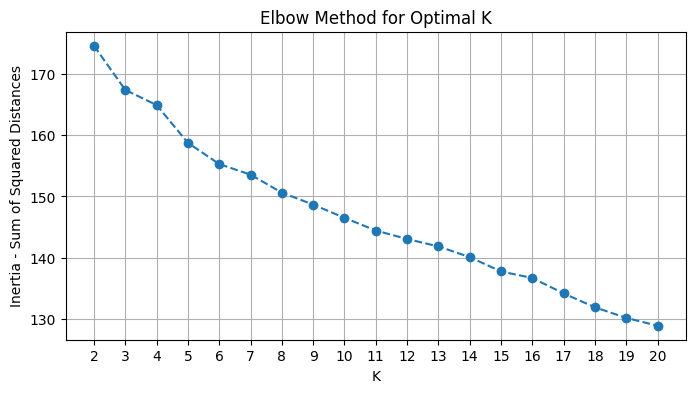

In [35]:
plt.figure(figsize=(8, 4))
plt.plot(list(k_range), inertia_values, marker='o', linestyle='--')
plt.xlabel("K")
plt.ylabel("Inertia - Sum of Squared Distances")
plt.title("Elbow Method for Optimal K")
plt.xticks(list(k_range))
plt.grid(True)

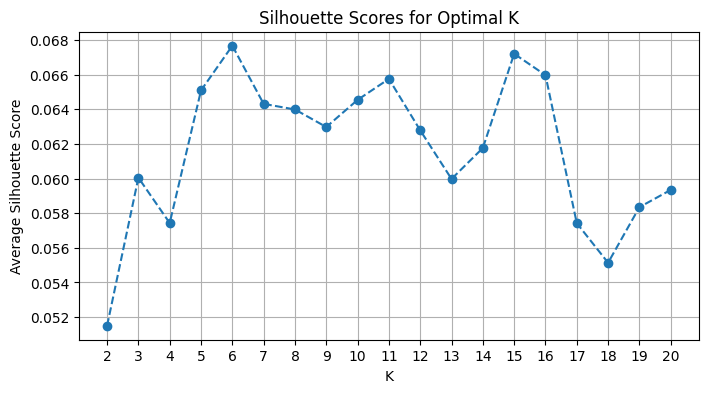

In [37]:
plt.figure(figsize=(8, 4))
plt.plot(list(k_range), silhouette_scores, marker='o', linestyle='--')
plt.xlabel("K")
plt.ylabel("Average Silhouette Score")
plt.title("Silhouette Scores for Optimal K")
plt.xticks(list(k_range))
plt.grid(True)

Note: 

The Elbow method suggests a K around 5 to 7.

The Silhouette scores show a prominent peak at K=6, and other notable peaks at K=11 and K=15.

Considering both we may chose K = 6

#### K means model training 

In [41]:
chosen_k = 6

kmeans_final_model = KMeans(n_clusters=chosen_k, n_init='auto', random_state=42)
print("K means model trained")

K means model trained


In [42]:
cluster_labels = kmeans_final_model.fit_predict(tfidf_matrix)

df['Cluster_Label'] = cluster_labels # adding cluster labels to a new column 
display(df[['Title', 'Skills_For_TFIDF', 'Cluster_Label']].head())


,Title,Skills_For_TFIDF,Cluster_Label
0,Machine Learning Physical Design Engineer,aartificial intelligence algorithms data struc...,0
1,"Staff Software Engineer - Monetization, Poe (R...",aartificial intelligence analytical and proble...,2
2,Staff Backend Engineer - Bot Creator Ecosystem...,aartificial intelligence api data science tech...,0
3,Senior Backend Engineer - Bot Creator Ecosyste...,aartificial intelligence api data science tech...,0
4,Data Scientist Lead - AIML,aartificial intelligence data science techniqu...,0


In [43]:
print("Distribution of jobs across clusters")
print(df['Cluster_Label'].value_counts().sort_index())

Distribution of jobs across clusters
Cluster_Label
0    59
1    29
2    16
3    37
4    43
5    26
Name: count, dtype: int64


Note:

don't have any clusters that are extremely tiny

K-Means was able to find meaningful groupings

In [45]:
models_dir = 'models' 
if not os.path.exists(models_dir):
    os.makedirs(models_dir)
        
model_path = os.path.join(models_dir, 'kmeans_model.joblib')
joblib.dump(kmeans_final_model, model_path)
print(f"\nTrained K-Means model (K={chosen_k}) saved to: {model_path}")


Trained K-Means model (K=6) saved to: models/kmeans_model.joblib


In [46]:
#save the DataFrame with the cluster labels for easy access
processed_csv_with_clusters_path = 'data/karkidi_jobs_processed_with_clusters.csv'
df.to_csv(processed_csv_with_clusters_path, index=False)

#### Interpreting the Clusters

In [52]:
#Top terms per cluster 
terms = tfidf_vectorizer.get_feature_names_out() #feature names from vectorizer 
cluster_centers = kmeans_final_model.cluster_centers_ #cluster centroids 

top_n_terms = 15 # number of terms to display 
for i, centroid in enumerate(cluster_centers):
    print(f"\nCluster {i}:")
    top_term_indices = centroid.argsort()[-top_n_terms:][::-1] #indices of top terms 

    cluster_terms = [(terms[index], centroid[index]) for index in top_term_indices] #actual terms 

    for term, score in cluster_terms:
            print(f"  - {term} (score: {score:.4f})")


Cluster 0:
  - language (score: 0.1106)
  - aartificial intelligence (score: 0.1098)
  - intelligence (score: 0.1098)
  - aartificial (score: 0.1098)
  - learning (score: 0.0829)
  - techniques (score: 0.0740)
  - programming (score: 0.0730)
  - natural (score: 0.0709)
  - natural language (score: 0.0709)
  - language processing (score: 0.0709)
  - learning techniques (score: 0.0707)
  - machine learning (score: 0.0707)
  - machine (score: 0.0707)
  - processing (score: 0.0695)
  - language models (score: 0.0643)

Cluster 1:
  - operating (score: 0.2725)
  - system (score: 0.2725)
  - operating system (score: 0.2725)
  - linux (score: 0.1511)
  - linux operating (score: 0.1511)
  - unix operating (score: 0.1302)
  - unix (score: 0.1302)
  - design (score: 0.1018)
  - system machine (score: 0.0971)
  - programming (score: 0.0890)
  - programming pytorch (score: 0.0856)
  - pytorch (score: 0.0785)
  - ui design (score: 0.0676)
  - ui (score: 0.0676)
  - aartificial (score: 0.0669)

Clus

#### Based on Results

    0: Natural Language Processing & ML,
    
    1: Systems Programming (Linux/Unix) & PyTorch,
    
    2: Cloud Data Services (AWS & Apache),
    
    3: DevOps & Multi-Cloud Platforms (AWS/GCP),
    
    4: Data Science & Analytics (SQL & Programming)
    
    5: Big Data Engineering (Java, Spark, Hadoop)
